In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(12,6)


In [2]:
data1=pd.read_csv('driver-data.csv')
data1.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [7]:
data1.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [8]:
#fit the K-Means model on the dataset

from sklearn.cluster import KMeans

In [9]:
kmeans=KMeans(n_clusters=2)
data_analyze=data1.drop('id',axis=1)
kmeans.fit(data_analyze)


KMeans(n_clusters=2)

In [10]:
# evaluate cluster centres and labels
kmeans.cluster_centers_

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [11]:
print(kmeans.labels_)

[0 0 0 ... 1 1 1]


In [12]:
print(len(kmeans.labels_))

4000


In [13]:
print(type(kmeans.labels_))
unique,counts=np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


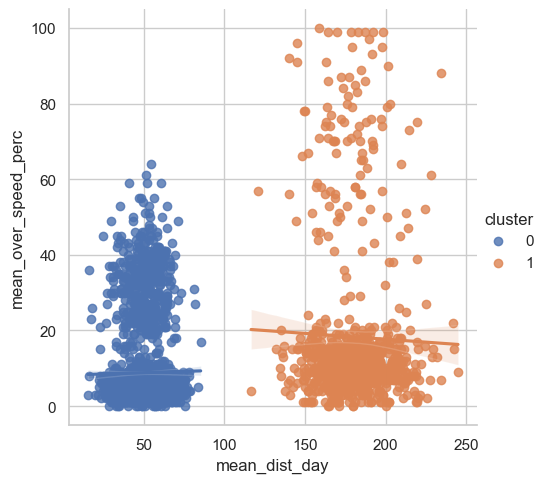

In [14]:
# plot the cluster to see the distribution of data points 

data_analyze['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', data=data_analyze, hue='cluster')


In [15]:
# iterate the same by changing the number of clusters to 3 and 4

kmeans_3=KMeans(n_clusters=3)
kmeans_3.fit(data_analyze)

KMeans(n_clusters=3)

In [16]:
kmeans_3.cluster_centers_

array([[ 5.00476344e+01,  8.82875000e+00, -1.30451205e-15],
       [ 1.80343118e+02,  1.05201149e+01,  1.00000000e+00],
       [ 1.77835096e+02,  7.02884615e+01,  1.00000000e+00]])

In [17]:
unique,counts=np.unique(kmeans_3.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{0: 3200, 1: 696, 2: 104}


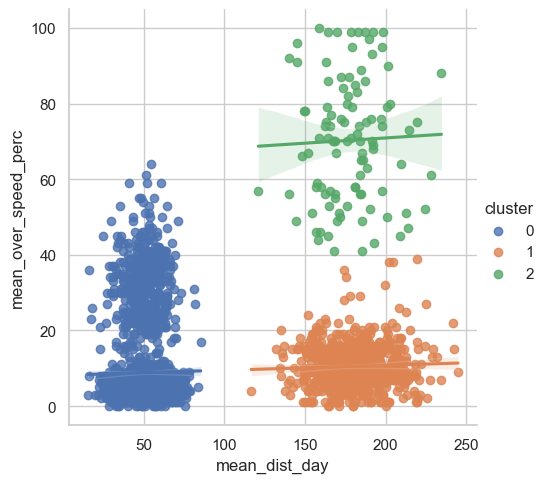

In [18]:
data_analyze['cluster']=kmeans_3.labels_
sns.set_style('whitegrid')
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', data=data_analyze, hue='cluster')

In [19]:
kmeans_4=KMeans(n_clusters=4)
kmeans_4.fit(data_analyze)

KMeans(n_clusters=4)

In [20]:
kmeans_4.cluster_centers_

array([[1.80343118e+02, 1.05201149e+01, 1.00000000e+00],
       [4.99842847e+01, 5.21441441e+00, 5.82867088e-16],
       [1.77835096e+02, 7.02884615e+01, 2.00000000e+00],
       [5.04612706e+01, 3.24282353e+01, 6.93889390e-16]])

In [21]:
unique,counts=np.unique(kmeans_4.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{0: 696, 1: 2775, 2: 104, 3: 425}


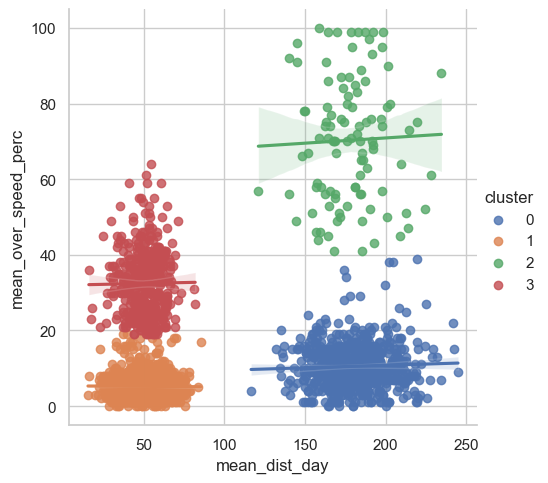

In [22]:
data_analyze['cluster']=kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', data=data_analyze, hue='cluster')

In [23]:
kmeans_5=KMeans(n_clusters=5)
kmeans_5.fit(data_analyze)

KMeans(n_clusters=5)

In [24]:
kmeans_5.cluster_centers_

array([[ 5.78976019e+01,  5.28127160e+00,  1.01589496e+00],
       [ 1.77835096e+02,  7.02884615e+01,  2.00000000e+00],
       [ 5.06142184e+01,  3.30620347e+01,  3.00000000e+00],
       [ 4.15200962e+01,  5.39600296e+00,  1.01480385e+00],
       [ 1.80434863e+02,  1.05294964e+01, -3.33066907e-15]])

In [25]:
unique,counts=np.unique(kmeans_5.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{0: 1447, 1: 104, 2: 403, 3: 1351, 4: 695}


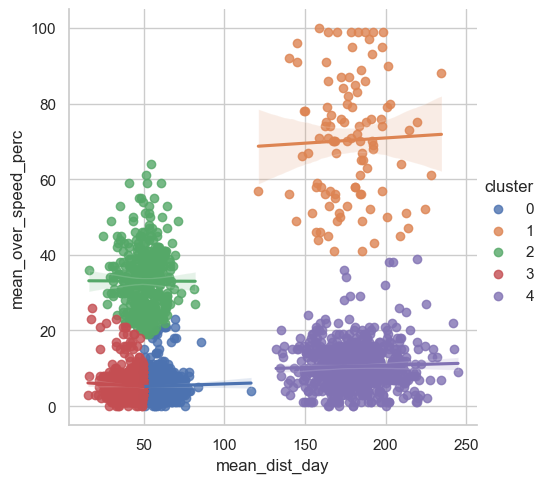

In [26]:
data_analyze['cluster']=kmeans_5.labels_
sns.set_style('whitegrid')
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', data=data_analyze, hue='cluster')

# Elbow Method

In [27]:
data1.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [30]:
sse = []

k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(data1[['mean_dist_day','mean_over_speed_perc']])

  sse.append(km.inertia_)

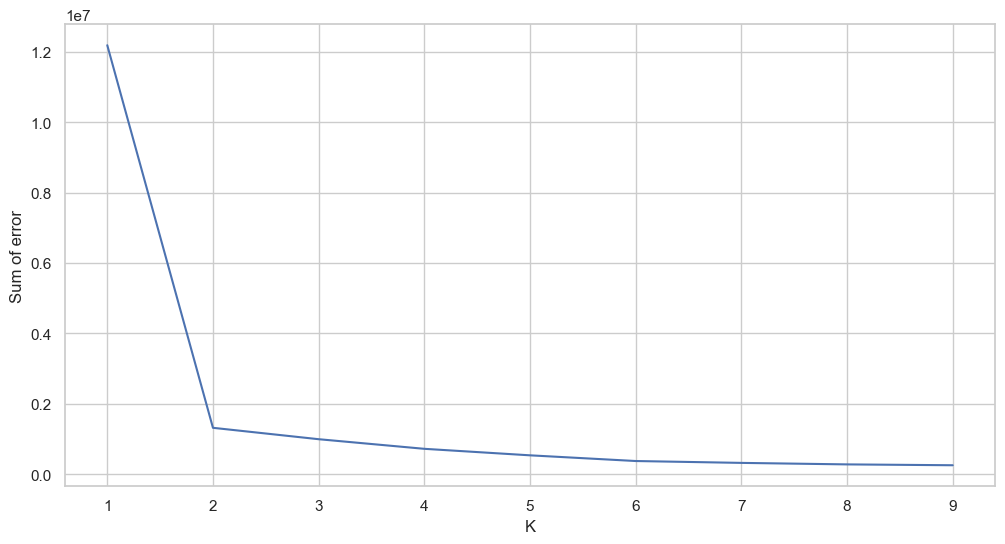

In [31]:
plt.xlabel('K')
plt.ylabel('Sum of error')
plt.plot(k_rng, sse)